In [ ]:
!pip install google-cloud-bigquery==1.25.0
!pip install --upgrade google-cloud-bigquery-storage

In [1]:
from google.cloud import bigquery
client = bigquery.Client()

## Top 10 and Bottom 10 Start Stations

In [2]:
# Create a dataframe for Top 10 start stations
sql = """
    SELECT start_station_name, COUNT(start_station_name) AS num 
    FROM `bigquery-public-data.new_york_citibike.citibike_trips`
    GROUP BY start_station_name 
    ORDER BY num DESC
    LIMIT 11
"""
df_top10_s = client.query(sql).to_dataframe()
df_top10_s.head(11)

,start_station_name,num
0,,5828994
1,Pershing Square North,438077
2,E 17 St & Broadway,423334
3,W 21 St & 6 Ave,403795
4,8 Ave & W 31 St,401554
5,West St & Chambers St,384116
6,Lafayette St & E 8 St,372255
7,Broadway & E 22 St,367194
8,Broadway & E 14 St,344546
9,8 Ave & W 33 St,330378


In [3]:
df_top10_s = df_top10_s.drop([0])

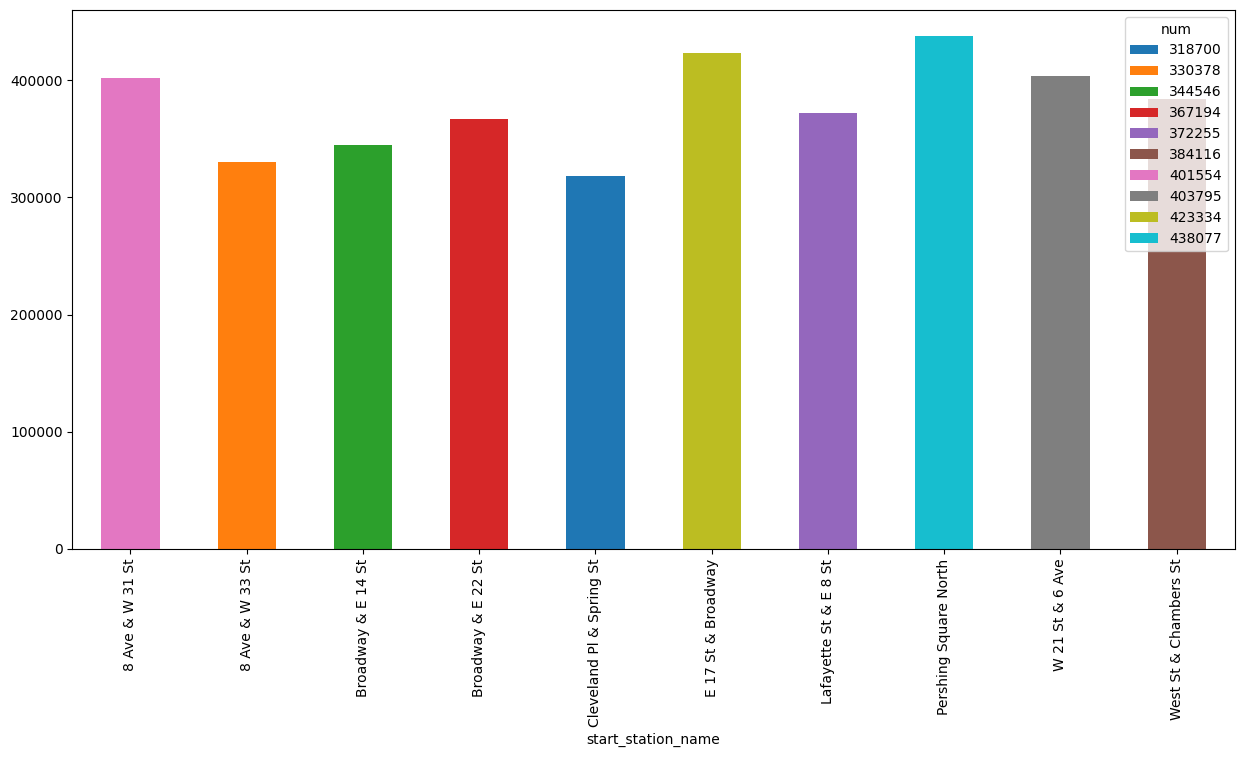

In [4]:
# Create a table for the Top 10 start station names
pivot_table_top10_s = df_top10_s.pivot(index='start_station_name', columns='num', values='num')
pivot_table_top10_s.plot(kind='bar', stacked=True, figsize=(15,7));

In [5]:
# Create a dataframe for Bottom 10 start stations
sql = """
    SELECT start_station_name, COUNT(start_station_name) AS num 
    FROM `bigquery-public-data.new_york_citibike.citibike_trips`
    GROUP BY start_station_name 
    ORDER BY num
    LIMIT 10
"""
df_bottom10_s = client.query(sql).to_dataframe()
df_bottom10_s.head(10)

,start_station_name,num
0,333 Johnson TEST 1,1
1,2 Ave & E 105 St,1
2,LPI Facility,2
3,Expansion Tech Station,2
4,Apache,3
5,NYCBS Depot - FAR,3
6,NYCBS DEPOT - DELANCEY,6
7,Gowanus Tech Station,7
8,Kiosk in a box Deployment,7
9,NYCBS Depot BAL - DYR,7


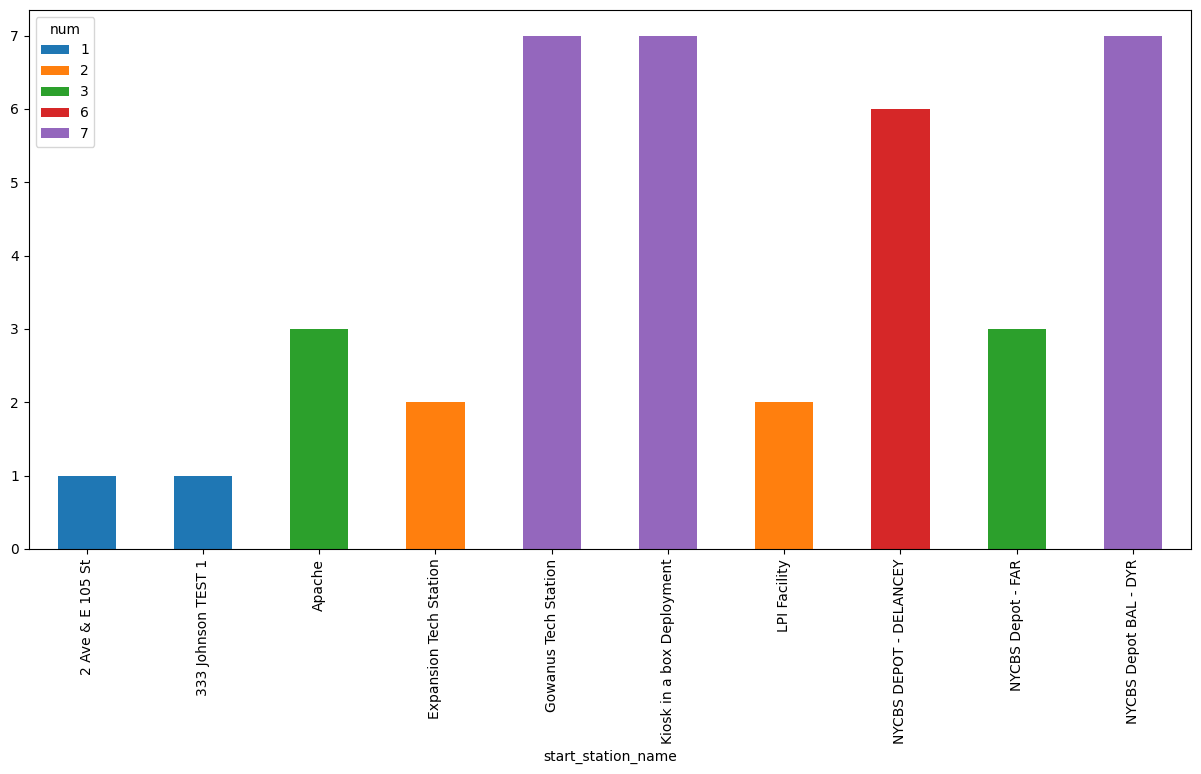

In [6]:
# Create a table for the Bottom 10 start station names
pivot_table_bottom10_s = df_bottom10_s.pivot(index='start_station_name', columns='num', values='num')
pivot_table_bottom10_s.plot(kind='bar', stacked=True, figsize=(15,7));

## Top 10 and Bottom 10 End Stations

In [7]:
# Create a dataframe for Top 10 end stations
sql = """
    SELECT end_station_name, COUNT(end_station_name) AS num 
    FROM `bigquery-public-data.new_york_citibike.citibike_trips`
    GROUP BY end_station_name 
    ORDER BY num DESC
    LIMIT 11
"""
df_top10_e = client.query(sql).to_dataframe()
df_top10_e.head(11)

,end_station_name,num
0,,5828994
1,E 17 St & Broadway,444460
2,Pershing Square North,419931
3,W 21 St & 6 Ave,407982
4,West St & Chambers St,399033
5,Broadway & E 22 St,377854
6,Lafayette St & E 8 St,372679
7,8 Ave & W 31 St,365306
8,Broadway & E 14 St,344033
9,W 20 St & 11 Ave,323647


In [8]:
df_top10_e = df_top10_e.drop([0])

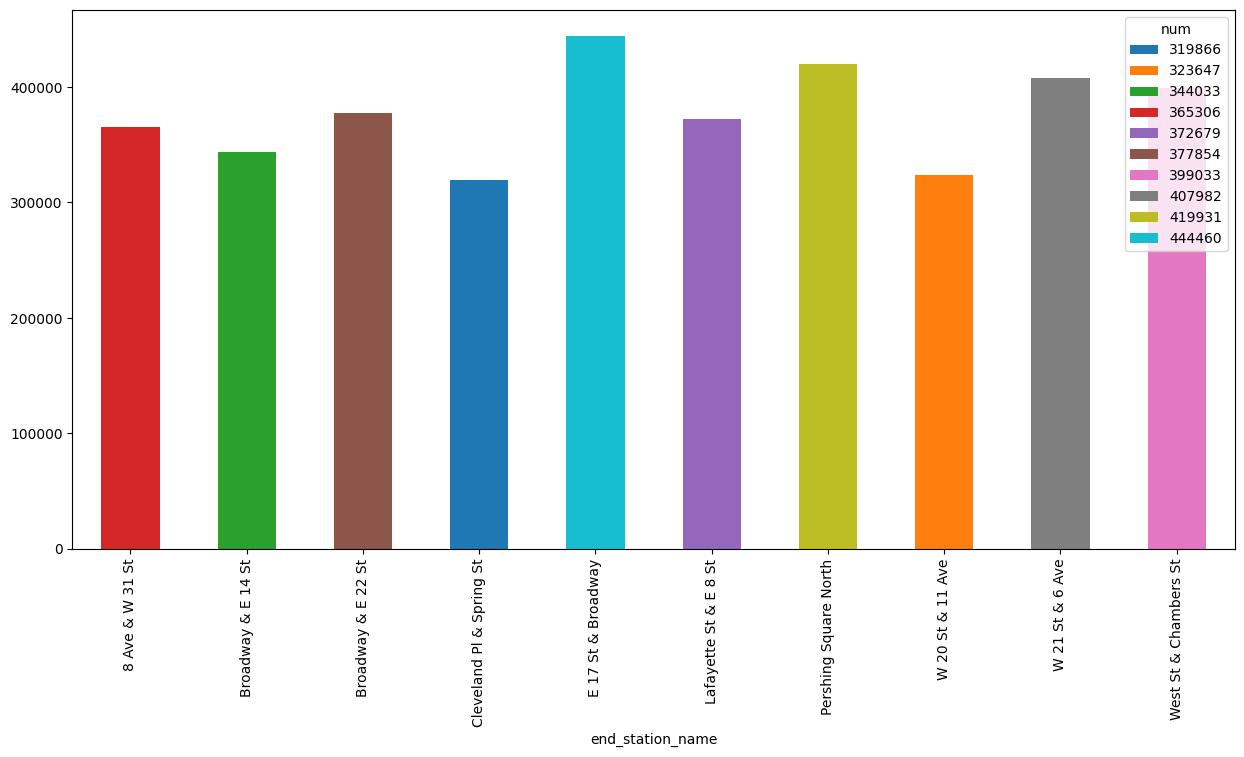

In [9]:
# Create a table for the Top 10 end station names
pivot_table_top10_e = df_top10_e.pivot(index='end_station_name', columns='num', values='num')
pivot_table_top10_e.plot(kind='bar', stacked=True, figsize=(15,7));

In [10]:
# Create a dataframe for Bottom 30 end stations
sql = """
    SELECT end_station_name, COUNT(end_station_name) AS num 
    FROM `bigquery-public-data.new_york_citibike.citibike_trips`
    GROUP BY end_station_name 
    ORDER BY num
    LIMIT 30
"""
df_bottom30_e = client.query(sql).to_dataframe()
df_bottom30_e.head(10)

,end_station_name,num
0,Grand St,1
1,JCBS Depot,1
2,Pathmark Depot,1
3,Jersey & 3rd,1
4,Hilltop,1
5,Communipaw & Berry Lane,1
6,NYCBS Depot - GOW Annex,1
7,333 Johnson TEST 1,1
8,Astor Place,1
9,Union St,1


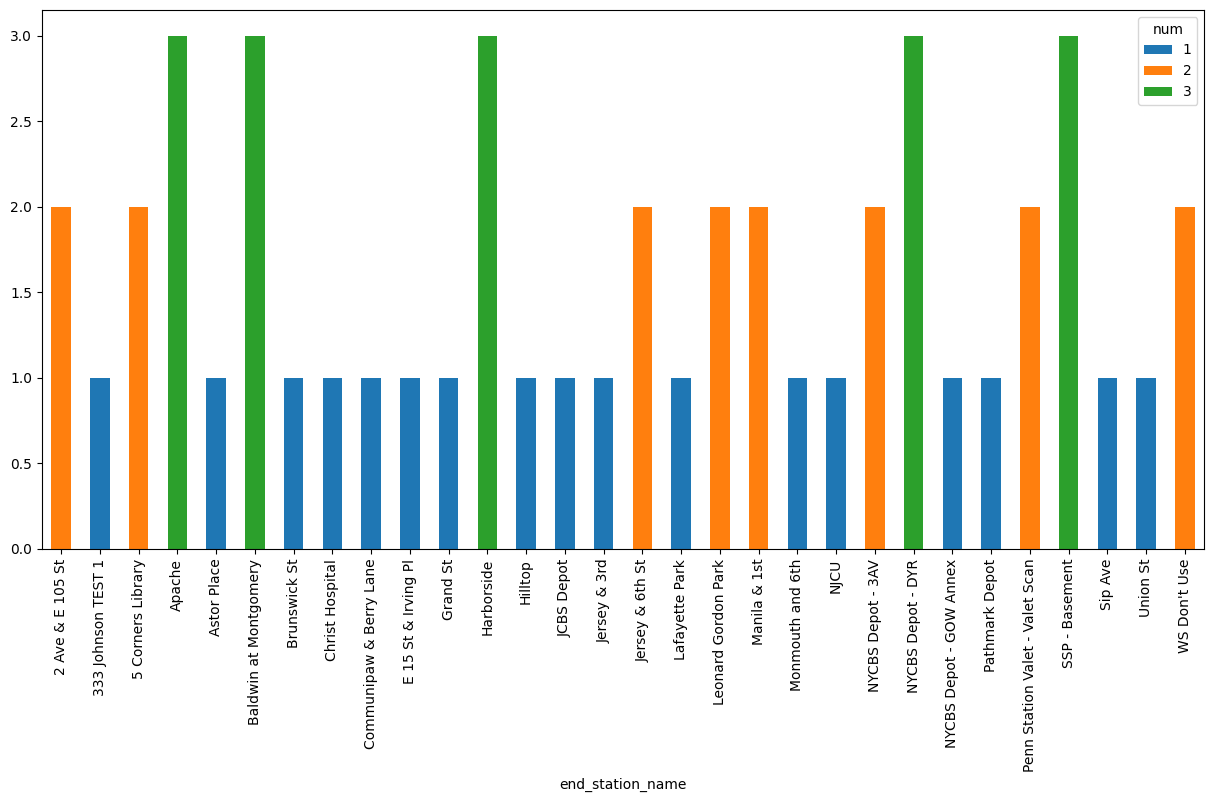

In [11]:
# Create a table for the Bottom 30 end station names
pivot_table_bottom30_e = df_bottom30_e.pivot(index='end_station_name', columns='num', values='num')
pivot_table_bottom30_e.plot(kind='bar', stacked=True, figsize=(15,7));

## Usertype

In [12]:
# Create a dataframe for usertype by year
sql = """
    SELECT
      EXTRACT(YEAR
      FROM
        starttime) AS year,
      usertype,
      COUNT(1) AS num_users
    FROM
      `bigquery-public-data.new_york_citibike.citibike_trips`
    GROUP BY
      year,
      usertype
    ORDER BY
      year
"""
df_yr_usertype = client.query(sql).to_dataframe()
df_yr_usertype.head(10)

,year,usertype,num_users
0,<NA>,,5828994
1,2013,Customer,666940
2,2013,Subscriber,4370245
3,2014,Subscriber,7287721
4,2014,Customer,793495
5,2015,Subscriber,8626638
6,2015,Customer,1311331
7,2016,Subscriber,9026384
8,2016,Customer,1236265
9,2017,Subscriber,12441957


In [13]:
df_yr_usertype = df_yr_usertype.drop([0])

In [14]:
df_yr_usertype.dtypes

year          Int64
usertype     object
num_users     Int64
dtype: object

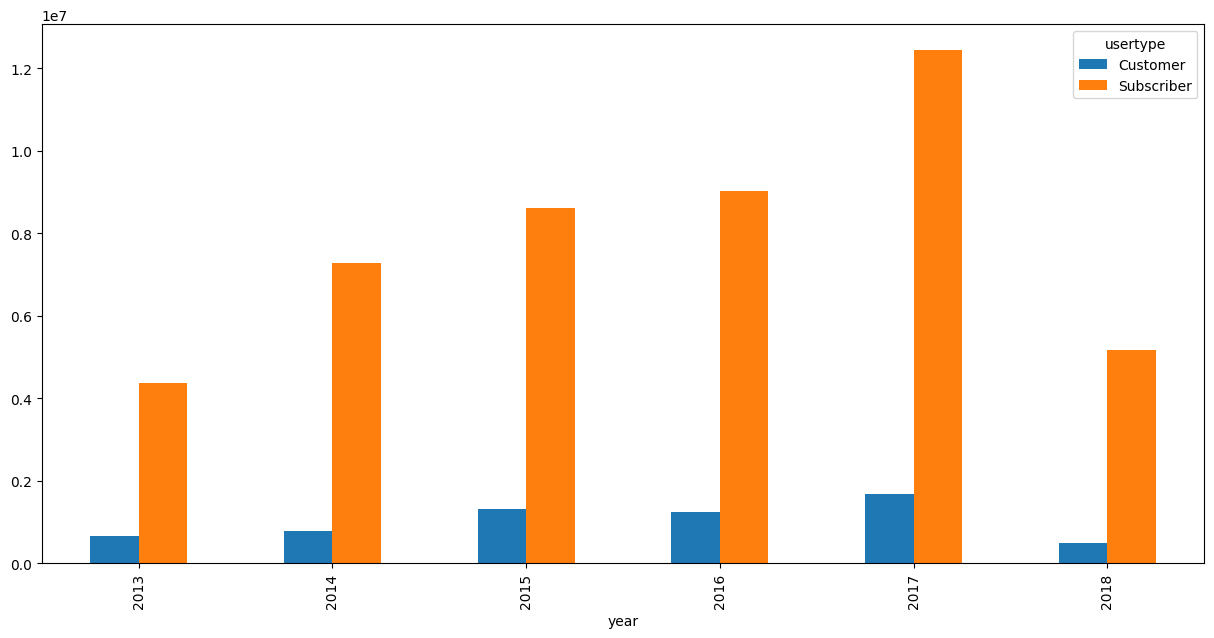

In [15]:
# Create and plot a pivot table for usertypes by year
pivot_table_yr_usertype = df_yr_usertype.pivot(index='year', columns='usertype', values='num_users')
pivot_table_yr_usertype.plot(kind='bar', stacked=False, figsize=(15,7));

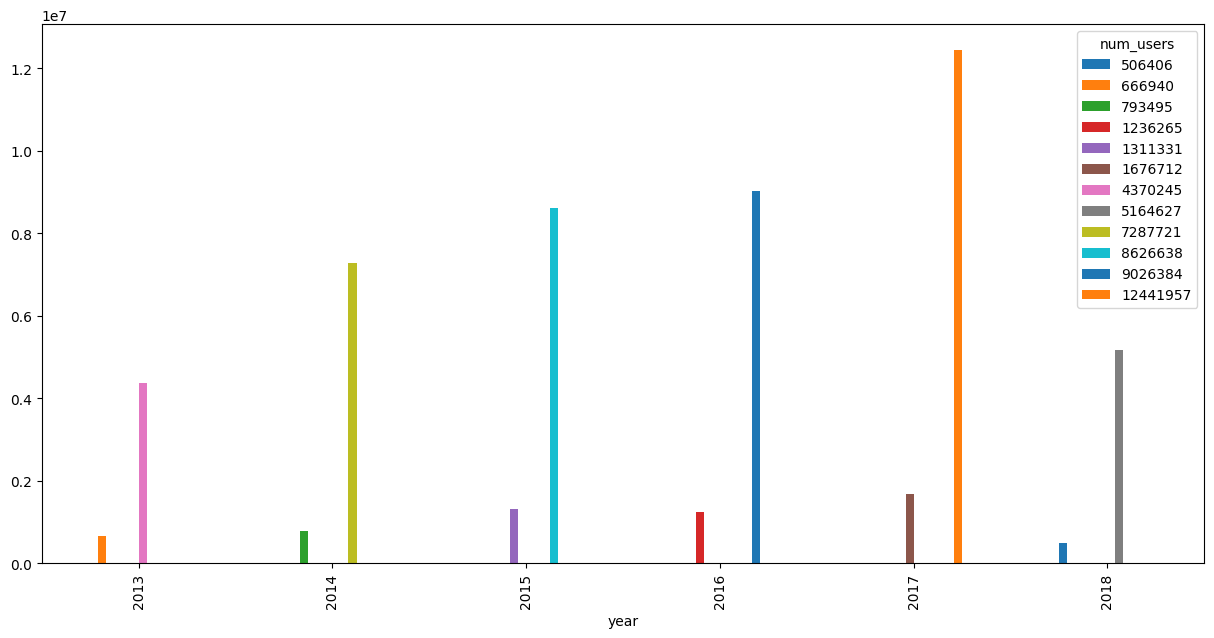

In [16]:
# Create and plot a pivot table for usertypes by year
pivot_table_yr_usertype = df_yr_usertype.pivot(index='year', columns='num_users', values='num_users')
pivot_table_yr_usertype.plot(kind='bar', stacked=False, figsize=(15,7));

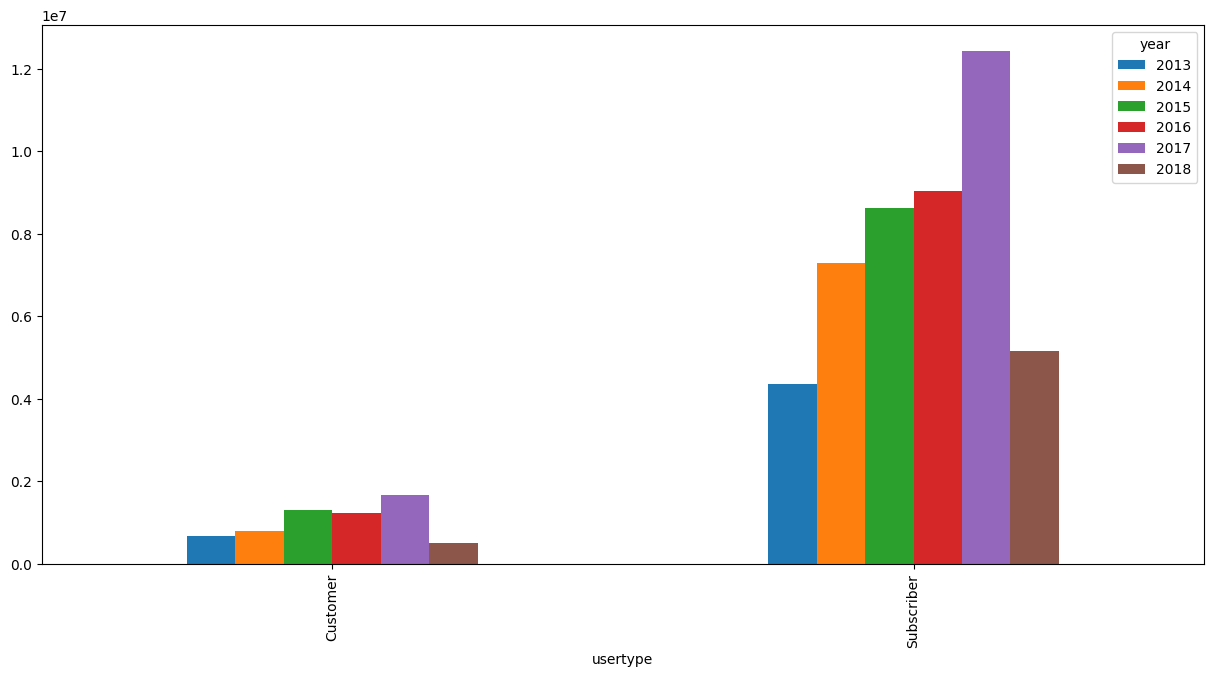

In [17]:
# Create and plot a pivot table for usertypes by year
pivot_table_yr_usertype = df_yr_usertype.pivot(index='usertype', columns='year', values='num_users')
pivot_table_yr_usertype.plot(kind='bar', stacked=False, figsize=(15,7));

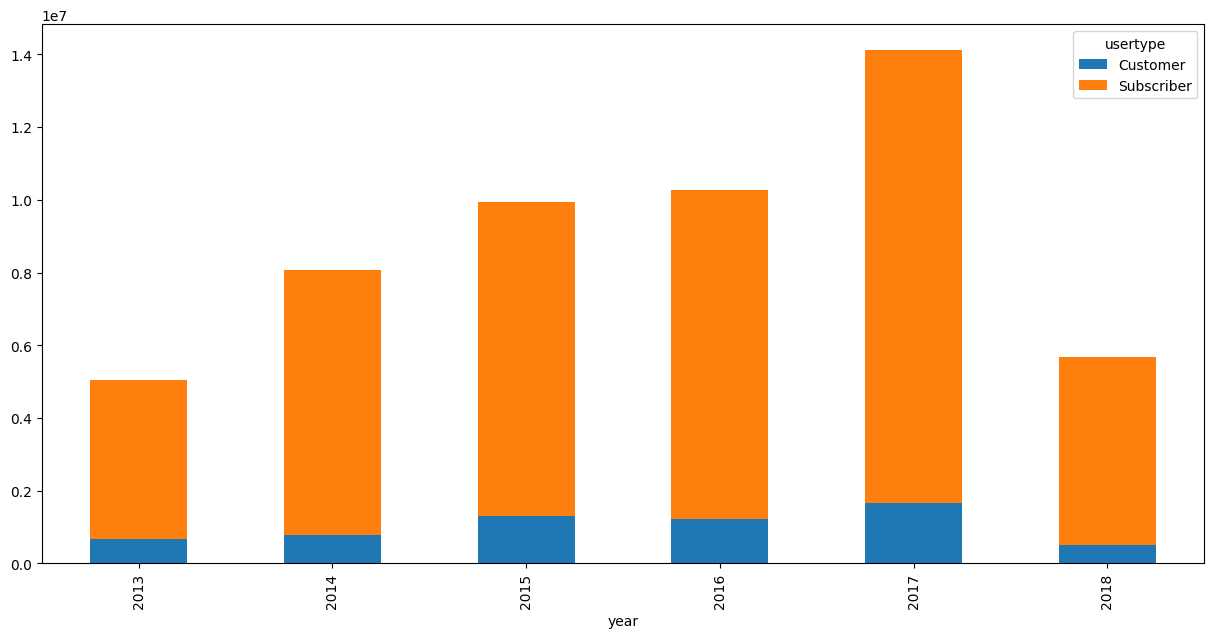

In [18]:
# Create and plot a pivot table for usertypes by year
pivot_table_yr_usertype = df_yr_usertype.pivot(index='year', columns='usertype', values='num_users')
pivot_table_yr_usertype.plot(kind='bar', stacked=True, figsize=(15,7));

## Gender

In [19]:
# Create a dataframe for gender by year
sql = """
    SELECT
      EXTRACT(YEAR
      FROM
        starttime) AS year,
      gender,
      COUNT(1) AS num_gender
    FROM
      `bigquery-public-data.new_york_citibike.citibike_trips`
    GROUP BY
      year,
      gender
    ORDER BY
      year
"""
df_yr_gender = client.query(sql).to_dataframe()
df_yr_gender.head(10)

,year,gender,num_gender
0,<NA>,,5828994
1,2013,male,3335391
2,2013,unknown,667163
3,2013,female,1034631
4,2014,male,5635962
5,2014,female,1650274
6,2014,unknown,794980
7,2015,unknown,1322078
8,2015,male,6608929
9,2015,female,2006962


In [20]:
df_yr_gender = df_yr_gender.drop([0])

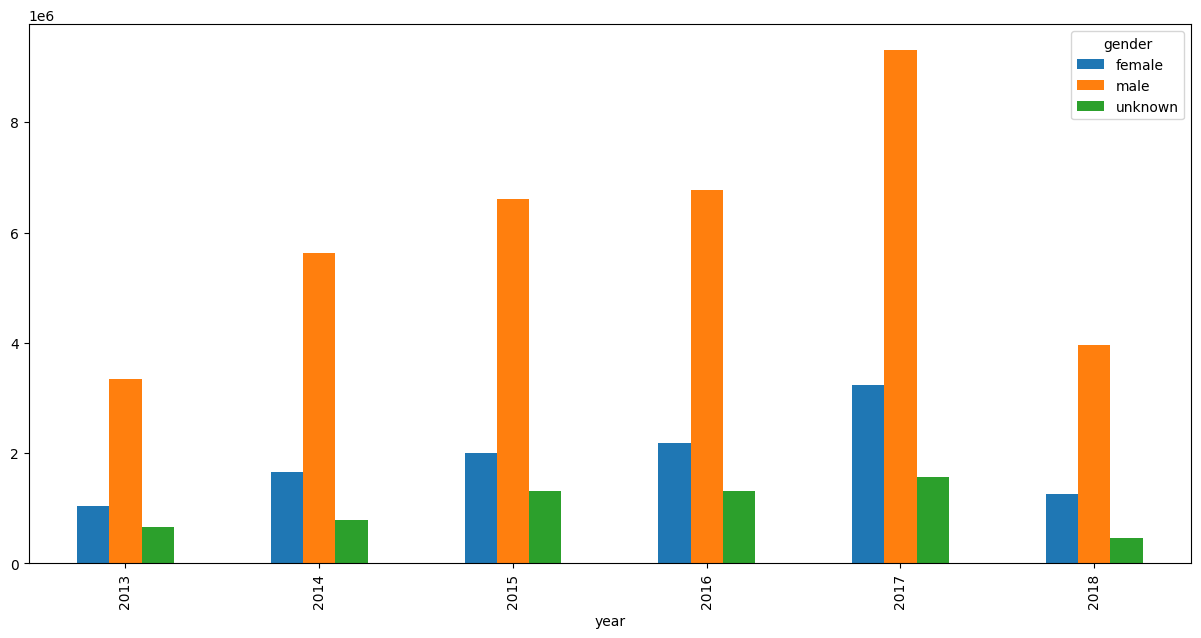

In [21]:
# Create and plot a pivot table for gender by year
pivot_table_yr_gender = df_yr_gender.pivot(index='year', columns='gender', values='num_gender')
pivot_table_yr_gender.plot(kind='bar', stacked=False, figsize=(15,7));

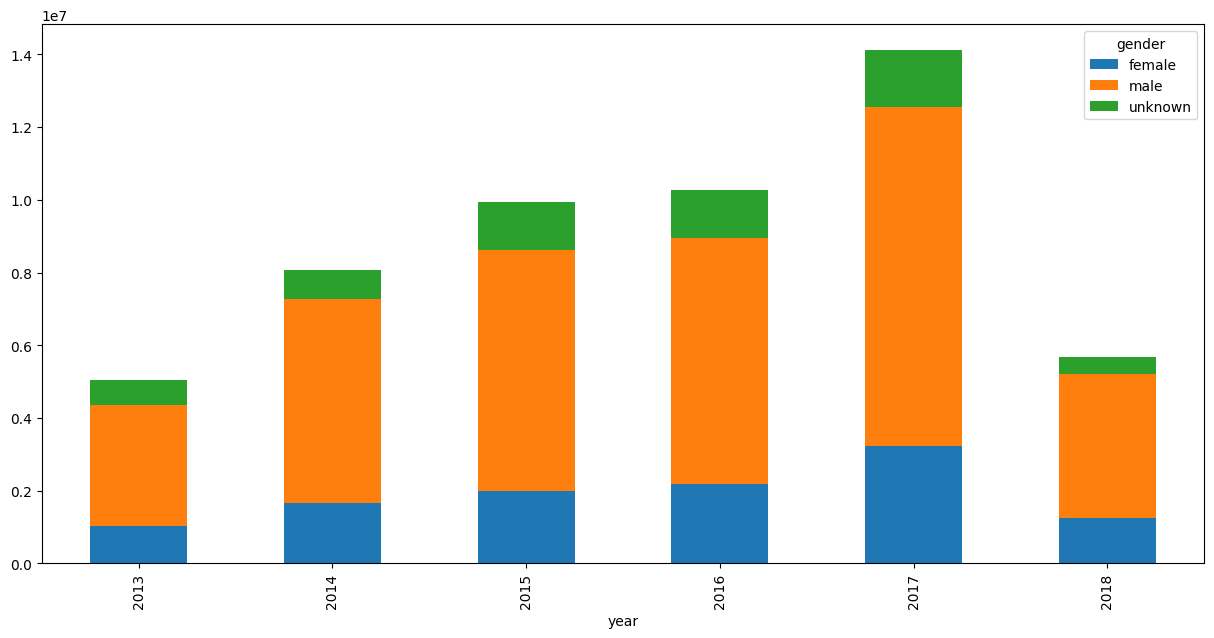

In [22]:
# Create and plot a pivot table for gender by year
pivot_table_yr_gender = df_yr_gender.pivot(index='year', columns='gender', values='num_gender')
pivot_table_yr_gender.plot(kind='bar', stacked=True, figsize=(15,7));

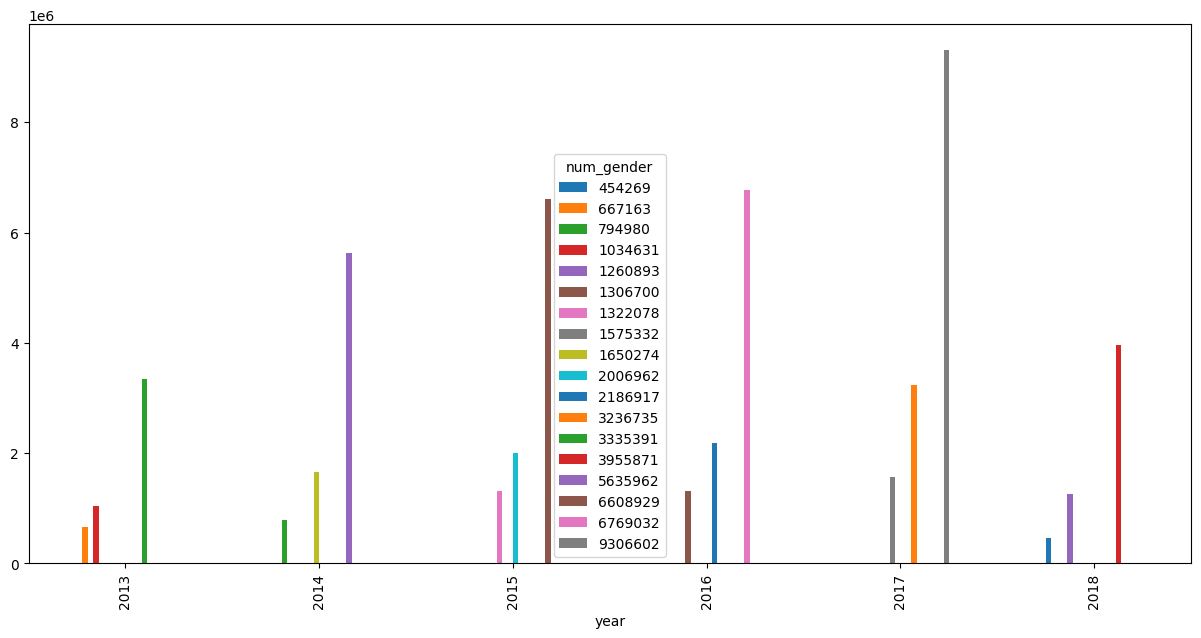

In [23]:
# Create and plot a pivot table for gender by year
pivot_table_yr_gender = df_yr_gender.pivot(index='year', columns='num_gender', values='num_gender')
pivot_table_yr_gender.plot(kind='bar', stacked=False, figsize=(15,7));

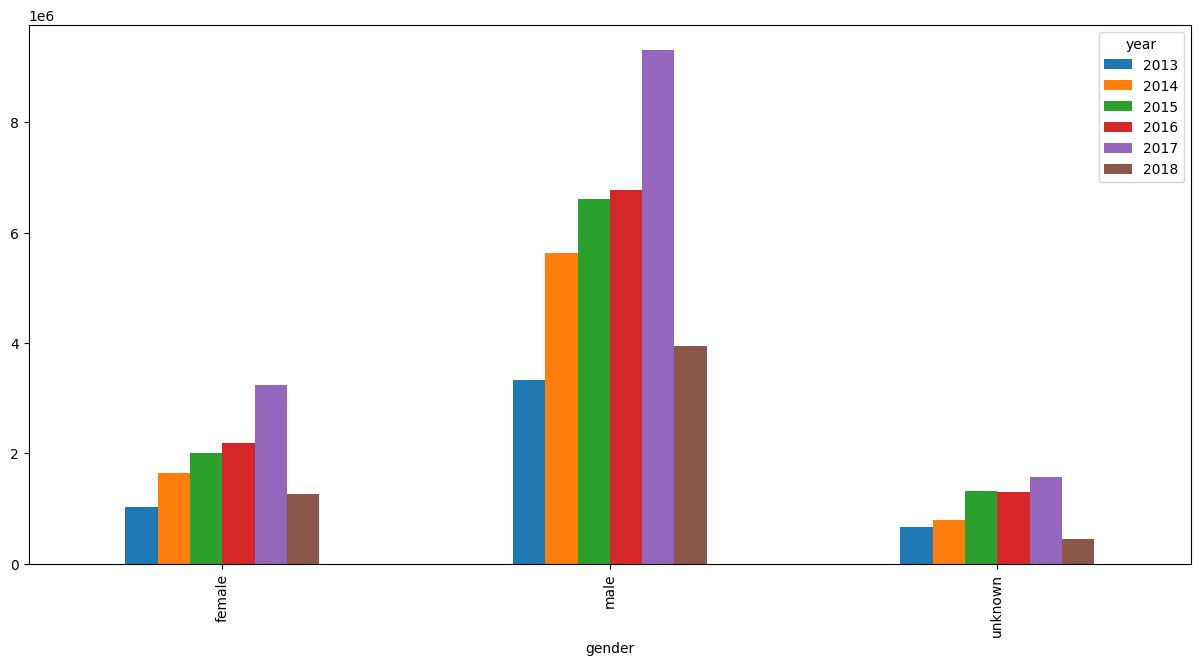

In [24]:
# Create and plot a pivot table for gender by year
pivot_table_yr_gender = df_yr_gender.pivot(index='gender', columns='year', values='num_gender')
pivot_table_yr_gender.plot(kind='bar', stacked=False, figsize=(15,7));